In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\sebne\\OneDrive\\Documents\\FHWN_Tulln\\DataAnalysis\\repo\\src\\notebooks'

## Collinearity Visualization

In [67]:
def plot_correlation(data, cotton_ratio):

    # Select every 5th spectral feature column for this filtered data
    spectra_data_filtered = data.filter(regex='^spectra').iloc[:, ::10]
    spectra_data_filtered.columns = spectra_data_filtered.columns.str.replace('spectra.', '').astype(float).astype(int)

    #data_50.columns = int(data_50.columns)
    #data_50.columns = str(data_50.columns)

    # Calculating the correlation matrix for the reduced set of spectral features
    correlation_matrix = spectra_data_filtered.corr()

    # Plotting the heatmap for the reduced set of spectral features
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, cmap="rainbow",  center=0, square=True, linewidths=.5, cbar_kws={"shrink": 1})
    plt.title(f"Correlation Heatmap of Every 5th Spectral Feature (reference.cotton={cotton_ratio})")
    plt.show()

In [65]:
spectral_data_path = "../../input/clean_csv/data_inspection"
file_path_all_data = 'spectra_nir_inspecting_50.csv'
data_50 = pd.read_csv(f"{spectral_data_path}/{file_path_all_data}")


In [5]:
file_path_all_data = 'spectra_nir_inspecting_43.csv'
data_43 = pd.read_csv(f"{spectral_data_path}/{file_path_all_data}")

In [6]:
file_path_all_data = 'spectra_nir_inspecting_23.csv'
data_23 = pd.read_csv(f"{spectral_data_path}/{file_path_all_data}")

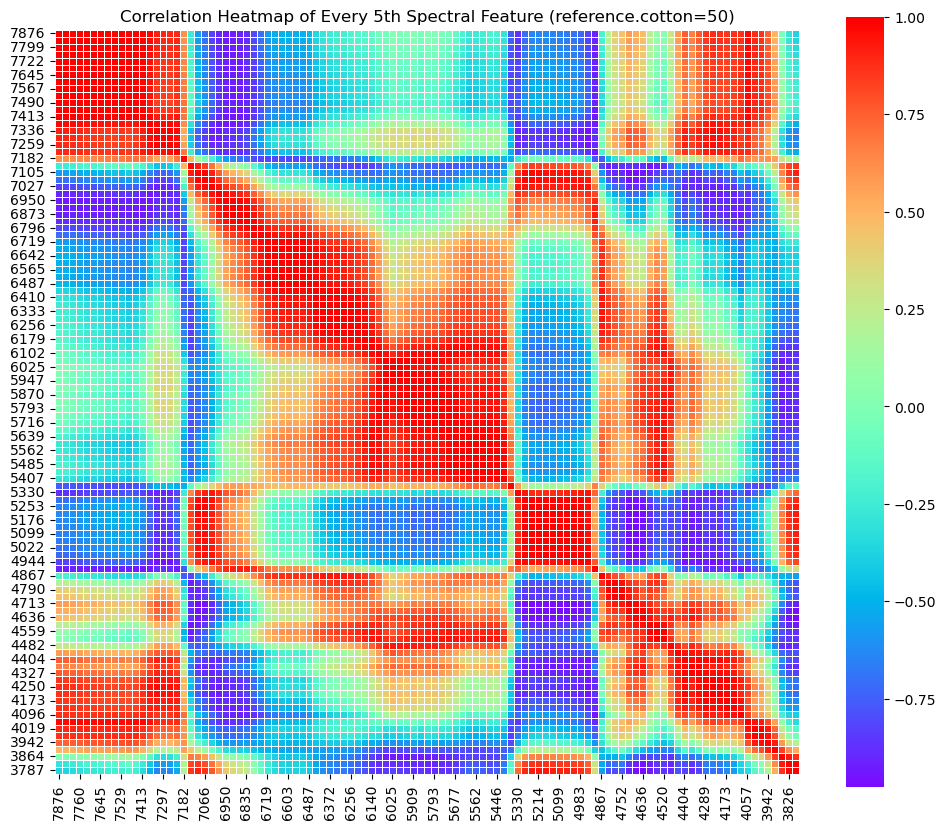

In [68]:
plot_correlation(data=data_50, cotton_ratio=50)


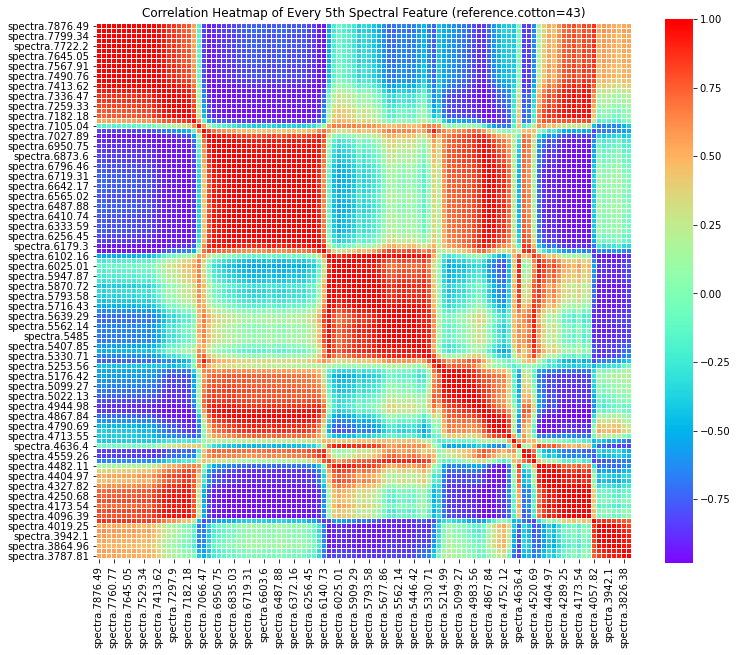

In [8]:
plot_correlation(data=data_43, cotton_ratio=43)


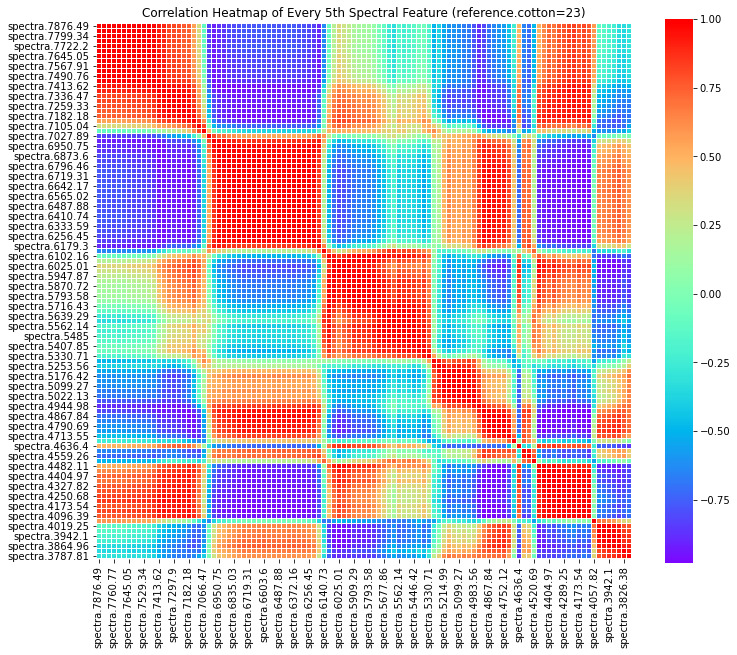

In [9]:
plot_correlation(data=data_23, cotton_ratio=23)


## Data Structure
How many spots per specimen have been measured

In [33]:
spectral_data_path = "../../input/clean_csv/pca_plotting"
file_path_all_data = 'spectra_no_preprocessing.csv'
data_nir = pd.read_csv(f"{spectral_data_path}/{file_path_all_data}")

In [34]:
spectral_data_path = "../../input/clean_csv"
file_path_all_data = 'spectra_mir_fixed.csv'
data_mir = pd.read_csv(f"{spectral_data_path}/{file_path_all_data}")
#data_mir.loc[data_mir["reference.cotton"] == 16, "reference.cotton"] = 16.5

In [36]:
summary = data_nir.groupby('reference.cotton').agg(
    reference_specimen_max=('reference.specimen', 'max'),
    reference_spot_count=('reference.spot', 'count')
).reset_index()
#print(summary)

In [37]:
def summary_pivot(df):
    summary = df.groupby(['reference.cotton','reference.specimen']).agg(
        reference_spot_count=('reference.spot', 'count')
    ).reset_index()
    df = pd.DataFrame(summary)
    df["reference.cotton"] = df["reference.cotton"].astype(str)
    
    df_pivot = df.pivot(index="reference.cotton", columns="reference.specimen", values="reference_spot_count").fillna(0)

    return df_pivot

In [38]:
df_pivot_nir = summary_pivot(data_nir)
df_pivot_mir = summary_pivot(data_mir)

In [39]:
df_pivot_nir

reference.specimen,1,2,3,4,5,6,7,8,9,10
reference.cotton,,,,,,,,,,
27.01,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31.57,10.0,10.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34.01,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38.25,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39.47,30.0,30.0,30.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0
40.93,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41.85,30.0,30.0,30.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0
43.0,10.0,10.0,20.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
47.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_pivot_mir

reference.specimen,1,2,3,4,5,6
reference.cotton,,,,,,
27.01,10.0,10.0,0.0,0.0,0.0,0.0
31.57,5.0,5.0,5.0,0.0,0.0,0.0
34.01,5.0,5.0,5.0,0.0,0.0,0.0
38.25,20.0,20.0,25.0,5.0,5.0,0.0
40.93,5.0,5.0,5.0,0.0,0.0,0.0
43.0,10.0,10.0,10.0,0.0,0.0,0.0
47.0,10.0,10.0,10.0,0.0,0.0,0.0
47.23,10.0,10.0,0.0,0.0,0.0,0.0
50.0,90.0,35.0,35.0,35.0,35.0,35.0


<Figure size 1200x600 with 0 Axes>

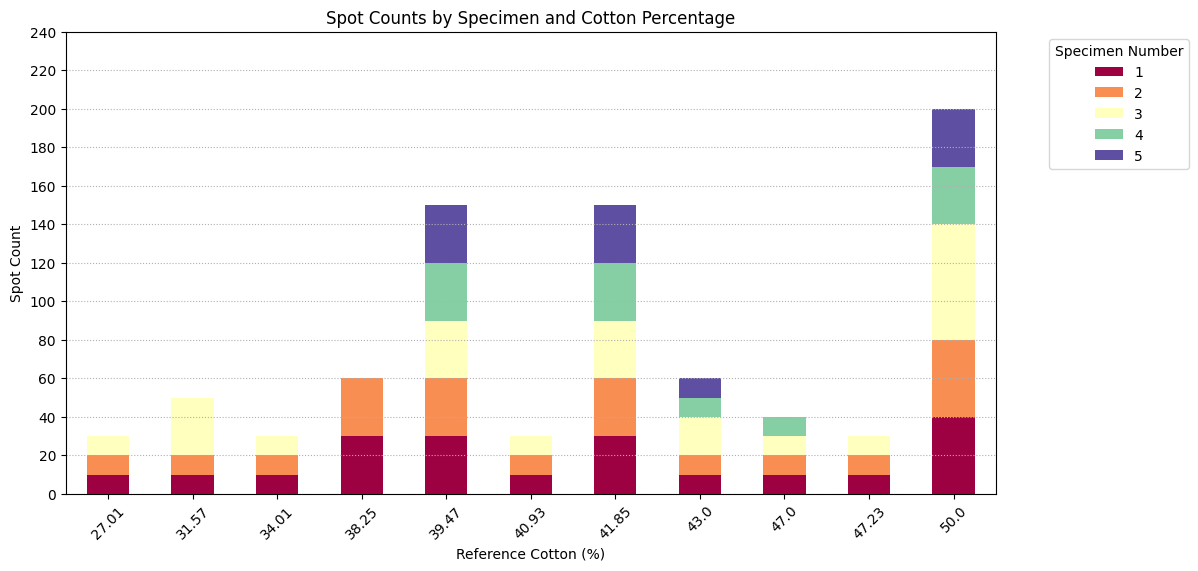

In [21]:
# Plot stacked bar chart
plt.figure(figsize=(12, 6))
df_pivot_nir.plot(kind="bar", stacked=True, colormap="Spectral", figsize=(12, 6))

# Labels and title
plt.xlabel("Reference Cotton (%)")
plt.ylabel("Spot Count")
plt.title("Spot Counts by Specimen and Cotton Percentage")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 250, step=20))
plt.legend(title="Specimen Number", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle=':')

plt.show()

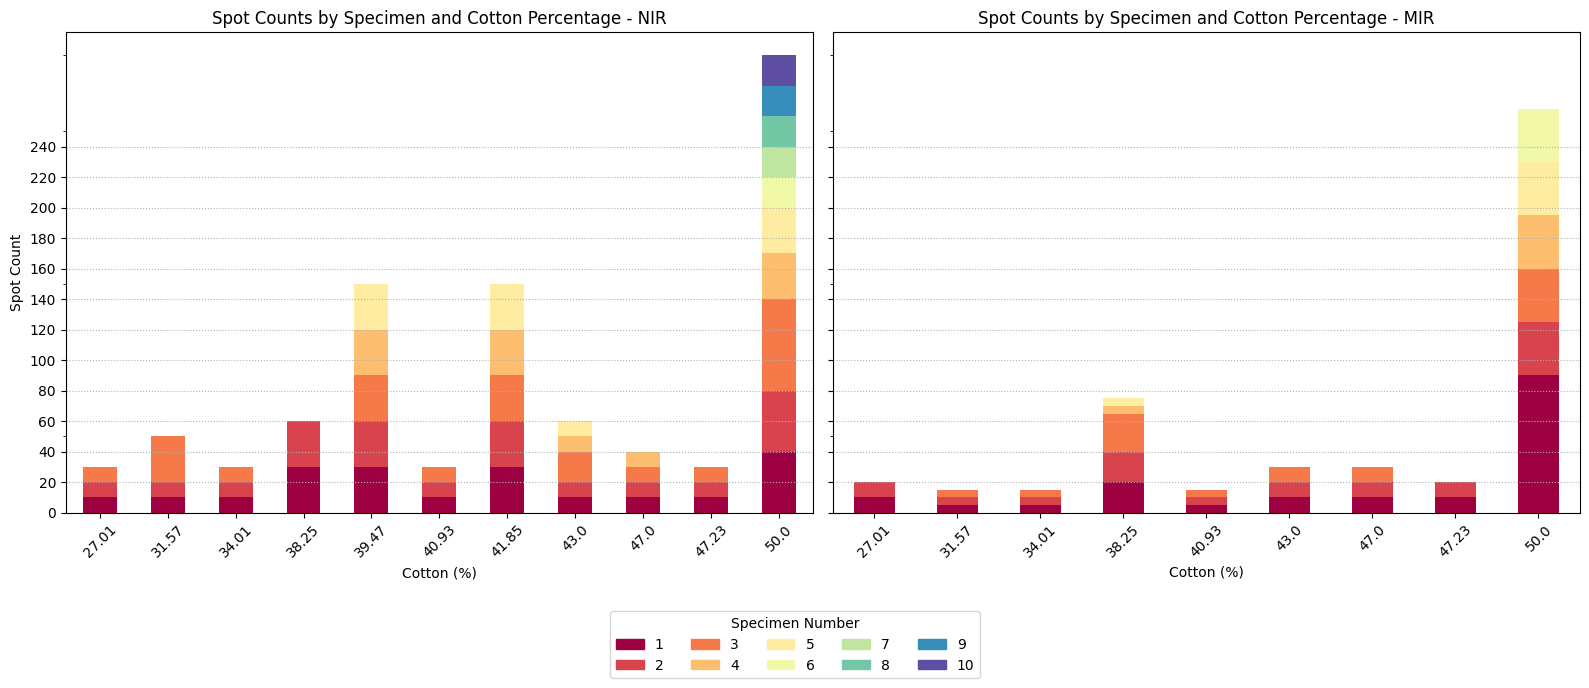

In [41]:
# Define a  color palette for specimens
specimen_numbers = sorted(df_pivot_nir.columns)  # Unique specimen numbers in df_pivot1
color_palette = plt.cm.Spectral(np.linspace(0, 1, len(specimen_numbers)))

# Create a mapping from specimen numbers to colors
specimen_color_map = {specimen: color_palette[i] for i, specimen in enumerate(specimen_numbers)}

# Create subplots for side-by-side stacked bar charts 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

# Plot first dataset 
df_pivot_nir.plot(kind="bar", stacked=True, color=[specimen_color_map[col] for col in df_pivot_nir.columns], ax=axes[0], legend=False)
axes[0].set_xlabel("Cotton (%)")
axes[0].set_ylabel("Spot Count")
axes[0].set_title("Spot Counts by Specimen and Cotton Percentage - NIR")
axes[0].set_xticklabels(df_pivot_nir.index, rotation=45)
axes[0].set_yticks(np.arange(0, 260, 20))
axes[0].grid(axis="y", linestyle=':')

# Plot second dataset 
df_pivot_mir.plot(kind="bar", stacked=True, color=[specimen_color_map[col] for col in df_pivot_mir.columns], ax=axes[1], legend=False)
axes[1].set_xlabel("Cotton (%)")
axes[1].set_title("Spot Counts by Specimen and Cotton Percentage - MIR")
axes[1].set_xticklabels(df_pivot_mir.index, rotation=45)
axes[1].grid(axis="y", linestyle=':')

# Use the legend from df_pivot_nir
handles = [plt.Rectangle((0,0),1,1, color=specimen_color_map[col]) for col in specimen_numbers]
labels = [str(col) for col in specimen_numbers]
fig.legend(handles, labels, title="Specimen Number", loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=len(specimen_numbers) // 2)


plt.tight_layout()  
plt.show()



### Calculate stdev

In [94]:
spectra_columns = [col for col in data_nir.columns if col.startswith('spectra.')]

# Compute the standard deviation of each cotton ratio
std_dev_by_cotton = data_nir.groupby('reference.cotton')[spectra_columns].std().reset_index()



In [100]:
average_std_dev_by_cotton = std_dev_by_cotton.copy()
average_std_dev_by_cotton['average_std_dev'] = average_std_dev_by_cotton.iloc[:, 1:].mean(axis=1)

# Select only reference.cotton and the computed average
average_std_dev_by_cotton = average_std_dev_by_cotton[['reference.cotton', 'average_std_dev']]
average_std_dev_by_cotton.round(4)



,reference.cotton,average_std_dev
0,16.50,0.0122
1,23.00,0.0100
2,25.00,0.0318
3,30.00,0.0347
4,35.00,0.0337
5,39.47,0.0153
6,41.85,0.0133
7,43.00,0.0136
8,45.00,0.0368
9,47.00,0.0167


In [101]:
data_nir.count(axis=0, numeric_only=False)

Unnamed: 0            830
reference.pet         830
reference.cotton      830
reference.specimen    830
reference.area        830
                     ... 
spectra.3803.24       830
spectra.3799.38       830
spectra.3795.53       830
spectra.3791.67       830
spectra.3787.81       830
Length: 912, dtype: int64

In [111]:
data_mir.shape[0]

485

In [ ]:
spectral_data_path = "../../input/test_data/"
file_path_all_data = 'spectra_nir_all.csv'
data_nir = pd.read_csv(f"{spectral_data_path}/{file_path_all_data}")